<a href="https://colab.research.google.com/github/Sisterno/ML_RedesNeuronales/blob/master/final_model/Modelo_Final_try1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Final

## Entrenamiento de modelo I06-D008

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from time import time
import pathlib
 
path_img_leucocitos = "/content/drive/MyDrive/ML/04-dataset-preprocesado-fusion";
pathlib_img_leucocitos=pathlib.Path(path_img_leucocitos)
 
from google.colab import drive
drive.mount('/content/drive')
 
# batch_size = 32
batch_size = 32
img_height = 180
img_width = 180
 
#-------------------------------------------------------------------------------
class TimingCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time()
    def on_epoch_end(self, batch, logs={}):
        self.times.append(time() - self.epoch_time_start)
#-------------------------------------------------------------------------------
 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)
 
AUTOTUNE = tf.data.AUTOTUNE
 
# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Mounted at /content/drive
Found 59877 files belonging to 5 classes.
Using 47902 files for training.
Found 59877 files belonging to 5 classes.
Using 11975 files for validation.


### Modelo DS002-I06-D008 / Modelo Seleccinado
Probemos reduciendo mas el nivel de regularizacion. 0.00004

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D008 = TimingCallback()
num_classes = 5
regularizer = 0.00004

model_I06_D008 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.Dense(num_classes)

])
model_I06_D008.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D008.summary()

epochs=20
history_I06_D008 = model_I06_D008.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D008]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 8238s 5s/step - loss: 8.1510 - accuracy: 0.5964 - val_loss: 0.6562 - val_accuracy: 0.7718
Epoch 2/20
1497/1497 [==============================] - 122s 81ms/step - loss: 0.5114 - accuracy: 0.8130 - val_loss: 0.4357 - val_accuracy: 0.8295
Epoch 3/20
1497/1497 [==============================] - 121s 81ms/step - loss: 0.3958 - accuracy: 0.8558 - val_loss: 0.3585 - val_accuracy: 0.8765
Epoch 4/20
1497/1497 [==============================] - 121s 81ms/step - loss: 0.3540 - accuracy: 0.8765 - val_loss: 0.3414 - val_accuracy: 0.8788
Epoch 5/20
1497/1497 [==============================] - 121s 81ms/step - loss: 0.3228 - accuracy: 0.8889 - val_loss: 0.2916 - val_accuracy: 0.9053
Epoch 6/20
1497/1497 [==============================] - 123s 82ms/step - loss: 0.2970 - accuracy: 0.9035 - val_loss: 0.2993 - val_accuracy: 0.9094
Epoch 7/20
1497/1497 [==============================] - 122s 81ms/step - loss: 0.2765 - accuracy: 0.9157 - val_loss: 0.

[8238.496703386307, 121.98853302001953, 121.06986618041992, 121.03231716156006, 121.38692712783813, 122.69961452484131, 122.16651201248169, 122.53443717956543, 123.40908813476562, 123.26013970375061, 123.33301568031311, 122.1570258140564, 122.30498218536377, 122.34608721733093, 122.16583061218262, 122.68000674247742, 122.02808880805969, 122.6447503566742, 122.95237159729004, 122.66803550720215]
El entrenamiento se demoro: 10563.3243329525 segundos
El entrenamiento se demoro: 176.05540554920833 minutos
accuracy => 0.9661391973495483
loss => 0.21058039367198944
val_accuracy => 0.9483090043067932
val_loss => 0.2654208540916443


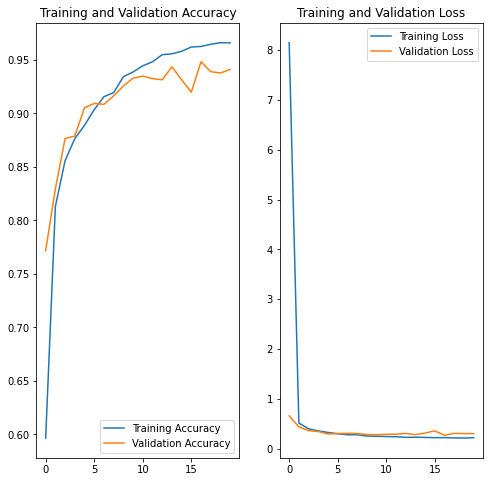

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D008.times)
final_time = 0
for time in cb_I06_D008.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D008.history['accuracy'])))
print('loss => '+ str(min(history_I06_D008.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D008.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D008.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D008.history['accuracy']
val_acc = history_I06_D008.history['val_accuracy']

loss=history_I06_D008.history['loss']
val_loss=history_I06_D008.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo DS002-I06-D008-T2 / Modelo Seleccinado
Probemos reduciendo mas el nivel de regularizacion. 0.00004

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D008_T2 = TimingCallback()
num_classes = 5
regularizer = 0.00004

model_I06_D008_T2 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.Dense(num_classes)

])
model_I06_D008_T2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D008_T2.summary()

epochs=20
history_I06_D008_T2 = model_I06_D008_T2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D008_T2]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 124s 82ms/step - loss: 14.0949 - accuracy: 0.4323 - val_loss: 1.0774 - val_accuracy: 0.5705
Epoch 2/20
1497/1497 [==============================] - 122s 81ms/step - loss: 0.8388 - accuracy: 0.6532 - val_loss: 0.5927 - val_accuracy: 0.7644
Epoch 3/20
1497/1497 [==============================] - 122s 81ms/step - loss: 0.5475 - accuracy: 0.7900 - val_loss: 0.4299 - val_accuracy: 0.8377
Epoch 4/20
1497/1497 [==============================] - 123s 82ms/step - loss: 0.4174 - accuracy: 0.8505 - val_loss: 0.4035 - val_accuracy: 0.8590
Epoch 5/20
1497/1497 [==============================] - 125s 83ms/step - loss: 0.4038 - accuracy: 0.8609 - val_loss: 0.3873 - val_accuracy: 0.8752
Epoch 6/20
1497/1497 [==============================] - 128s 85ms/step - loss: 0.3375 - accuracy: 0.8945 - val_loss: 0.3738 - val_accuracy: 0.8882
Epoch 7/20
1497/1497 [==============================] - 128s 85ms/step - loss: 0.3308 - accuracy: 0.9045 - val_loss: 

[123.86352324485779, 122.20773315429688, 121.88722658157349, 122.63395071029663, 125.30837178230286, 128.0108687877655, 128.08549213409424, 127.48984813690186, 126.88818502426147, 127.0212070941925, 127.27892899513245, 127.64460372924805, 126.98701047897339, 126.62348103523254, 126.93042469024658, 126.66614723205566, 127.43630194664001, 126.42900538444519, 127.40451574325562, 127.6023964881897]
El entrenamiento se demoro: 2524.3992223739624 segundos
El entrenamiento se demoro: 42.073320372899374 minutos
accuracy => 0.9641559720039368
loss => 0.2567349970340729
val_accuracy => 0.9455532431602478
val_loss => 0.30103328824043274


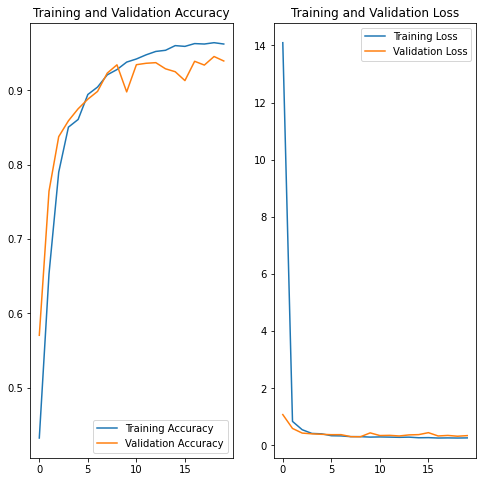

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D008_T2.times)
final_time = 0
for time in cb_I06_D008_T2.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D008_T2.history['accuracy'])))
print('loss => '+ str(min(history_I06_D008_T2.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D008_T2.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D008_T2.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D008_T2.history['accuracy']
val_acc = history_I06_D008_T2.history['val_accuracy']

loss=history_I06_D008_T2.history['loss']
val_loss=history_I06_D008_T2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo DS002-I06-D008-T3 / Modelo Seleccinado
Probemos reduciendo mas el nivel de regularizacion. 0.00004

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D008_T3 = TimingCallback()
num_classes = 5
regularizer = 0.00004

model_I06_D008_T3 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.Dense(num_classes)

])
model_I06_D008_T3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D008_T3.summary()

epochs=10
history_I06_D008_T3 = model_I06_D008_T3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D008_T3]
)

#-------------------------------------------------------------------------------

Epoch 1/10
1497/1497 [==============================] - 130s 86ms/step - loss: 4.8752 - accuracy: 0.5669 - val_loss: 0.7267 - val_accuracy: 0.7086
Epoch 2/10
1497/1497 [==============================] - 129s 86ms/step - loss: 0.5281 - accuracy: 0.8032 - val_loss: 0.4368 - val_accuracy: 0.8470
Epoch 3/10
1497/1497 [==============================] - 126s 84ms/step - loss: 0.3794 - accuracy: 0.8627 - val_loss: 0.3097 - val_accuracy: 0.8919
Epoch 4/10
1497/1497 [==============================] - 125s 83ms/step - loss: 0.3211 - accuracy: 0.8912 - val_loss: 0.3147 - val_accuracy: 0.8986
Epoch 5/10
1497/1497 [==============================] - 125s 83ms/step - loss: 0.2832 - accuracy: 0.9135 - val_loss: 0.3609 - val_accuracy: 0.8824
Epoch 6/10
1497/1497 [==============================] - 124s 83ms/step - loss: 0.2713 - accuracy: 0.9250 - val_loss: 0.2640 - val_accuracy: 0.9303
Epoch 7/10
1497/1497 [==============================] - 123s 82ms/step - loss: 0.2628 - accuracy: 0.9330 - val_loss: 0

[130.37923192977905, 129.30130290985107, 125.89300394058228, 124.82430696487427, 124.64284944534302, 124.32869029045105, 123.07301425933838, 124.61756467819214, 124.3763358592987, 125.23850107192993]
El entrenamiento se demoro: 1256.67480134964 segundos
El entrenamiento se demoro: 20.944580022493998 minutos
accuracy => 0.9524863362312317
loss => 0.24536292254924774
val_accuracy => 0.9391231536865234
val_loss => 0.2639908492565155


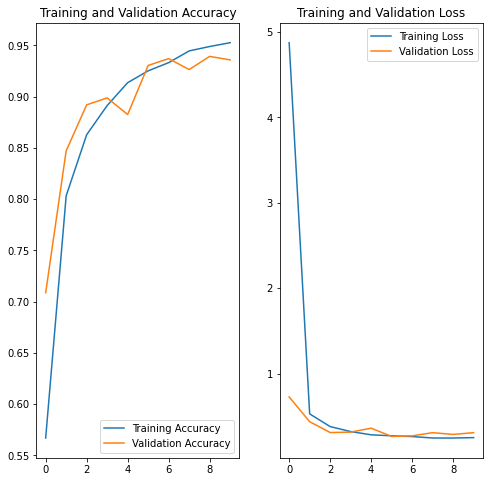

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D008_T3.times)
final_time = 0
for time in cb_I06_D008_T3.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D008_T3.history['accuracy'])))
print('loss => '+ str(min(history_I06_D008_T3.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D008_T3.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D008_T3.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D008_T3.history['accuracy']
val_acc = history_I06_D008_T3.history['val_accuracy']

loss=history_I06_D008_T3.history['loss']
val_loss=history_I06_D008_T3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
history_I06_D008_T3_array = []

In [ ]:
history_I06_D008_T3_array.append(model_I06_D008_T3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=1,
))

1497/1497 [==============================] - 124s 83ms/step - loss: 0.2414 - accuracy: 0.9603 - val_loss: 0.3740 - val_accuracy: 0.9193


In [ ]:
history_I06_D008_T3_array[2].history

{'accuracy': [0.9602521657943726],
 'loss': [0.2413562536239624],
 'val_accuracy': [0.919331967830658],
 'val_loss': [0.3740190267562866]}

In [ ]:
x = True
i=2
while x:
  i+=1
  history_I06_D008_T3_array.append(model_I06_D008_T3.fit(
    train_ds,
    validation_data=val_ds,
    epochs=1,
  ))
  if history_I06_D008_T3_array[i].history['val_accuracy'][0] >= 0.95:
    x = False

1497/1497 [==============================] - 124s 83ms/step - loss: 0.2305 - accuracy: 0.9657 - val_loss: 0.2702 - val_accuracy: 0.9519


In [ ]:
history_I06_D008_T3.history['accuracy']

[0.5669074654579163,
 0.8031606078147888,
 0.862719714641571,
 0.8911945223808289,
 0.9134900569915771,
 0.9250344634056091,
 0.9330299496650696,
 0.9444490671157837,
 0.9487495422363281,
 0.9524863362312317,
 0.9574548006057739,
 0.9545530676841736,
 0.9602521657943726,
 0.9620266556739807,
 0.9657008051872253,
 0.9574548006057739,
 0.9545530676841736,
 0.9602521657943726,
 0.9620266556739807,
 0.9657008051872253]

In [ ]:
acc = history_I06_D008_T3.history['accuracy']
val_acc = history_I06_D008_T3.history['val_accuracy']

loss=history_I06_D008_T3.history['loss']
val_loss=history_I06_D008_T3.history['val_loss']

for try_history in history_I06_D008_T3_array:
  acc.append(try_history.history['accuracy'][0])
  val_acc.append(try_history.history['val_accuracy'][0])
  loss.append(try_history.history['loss'][0])
  val_loss.append(try_history.history['val_loss'][0])

In [ ]:
acc = acc.copy()
val_acc = val_acc.copy()
loss = loss.copy()
val_loss = val_loss.copy()

In [ ]:
for a in range(5):
  val_acc.pop()
  loss.pop()
  val_loss.pop()

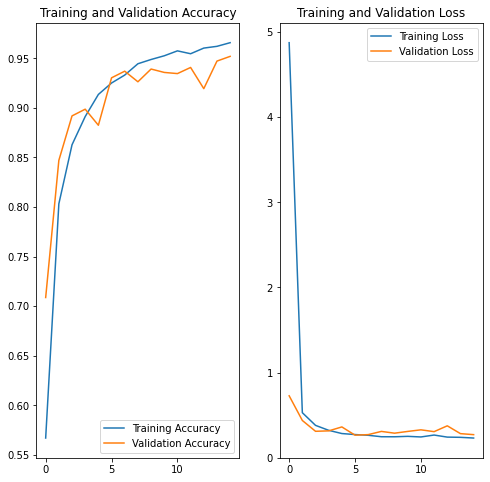

In [ ]:
epochs_range = range(epochs+i+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model_I06_D008_T3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 64)       

In [ ]:
model_I06_D008_T3.save_weights('/content/drive/MyDrive/ML_tesis/Final_model/pesos/formato_ckpt/pesos.ckpt')
model_I06_D008_T3.save_weights('/content/drive/MyDrive/ML_tesis/Final_model/pesos/formato_hdf5/pesos.h5')

In [ ]:
model_I06_D008_T3.save('/content/drive/MyDrive/ML_tesis/Final_model/modelo/formato_default/final_model')
model_I06_D008_T3.save('/content/drive/MyDrive/ML_tesis/Final_model/modelo/formato_hdf5/final_model.h5')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_tesis/Final_model/modelo/formato_default/final_model/assets


## Pruebas de uno a uno con modelo recien entrenado

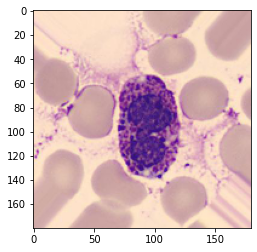

In [ ]:
# path_img_test = '/content/drive/MyDrive/ML_tesis/TEST/img_test/EO_106191.jpg'
# path_img_test = '/content/drive/MyDrive/ML_tesis/TEST/img_test/LY_896867.jpg'
# path_img_test = '/content/drive/MyDrive/ML_tesis/TEST/img_test/MO_801295.jpg'
# path_img_test = '/content/drive/MyDrive/ML_tesis/TEST/img_test/SNE_670300.jpg'
path_img_test = '/content/drive/MyDrive/ML_tesis/TEST/img_test/bas_13.jpg'

img_original = keras.preprocessing.image.load_img(path_img_test)

img_height = 180
img_width = 180
img_reescaled = keras.preprocessing.image.load_img(path_img_test,target_size=(img_height,img_width))
plt.imshow(img_reescaled)
plt.show()

img_array = keras.preprocessing.image.img_to_array(img_reescaled)
# print(img_array)
img_batch = np.expand_dims(img_array, axis=0)
# img_preprocessed = keras.preprocessing.image. preprocess_input(img_batch)

In [ ]:
res = model_I06_D008_T3.predict(img_batch)

In [ ]:
# Basofilo
res

array([[39.970375, 21.090948, 12.707574, 24.327065, 18.685102]],
      dtype=float32)

In [ ]:
# Eosinofilo
res

array([[ 1.4420302, 28.83935  , -2.7560425, -0.4367484, 11.175965 ]],
      dtype=float32)

In [ ]:
# Lymfosito
res

array([[12.671475,  8.581212, 26.967503, 14.550474, 14.120594]],
      dtype=float32)

In [ ]:
# Monosito
res

array([[ -9.8773775, -11.063689 ,  -6.167786 ,   4.3358784,  -3.5612743]],
      dtype=float32)

In [ ]:
# Neutrofilo
res

array([[-4.835426 ,  2.5423229, -8.10254  , -2.9555664,  7.4468555]],
      dtype=float32)

## Prueba de carga de modelo y pruebas unitarias con carga

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from time import time
import pathlib

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/ML_tesis/Final_model/modelo/formato_default/final_model')

### Testeando prediccion

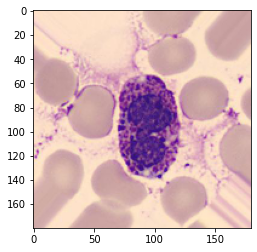

In [ ]:
# path_img_test = '/content/drive/MyDrive/ML_tesis/TEST/img_test/EO_106191.jpg'
# path_img_test = '/content/drive/MyDrive/ML_tesis/TEST/img_test/LY_896867.jpg'
path_img_test = '/content/drive/MyDrive/ML_tesis/TEST/img_test/MO_801295.jpg'
# path_img_test = '/content/drive/MyDrive/ML_tesis/TEST/img_test/SNE_670300.jpg'
# path_img_test = '/content/drive/MyDrive/ML_tesis/TEST/img_test/bas_13.jpg'

img_original = keras.preprocessing.image.load_img(path_img_test)

img_height = 180
img_width = 180
img_reescaled = keras.preprocessing.image.load_img(path_img_test,target_size=(img_height,img_width))
plt.imshow(img_reescaled)
plt.show()

img_array = keras.preprocessing.image.img_to_array(img_reescaled)
# print(img_array)
img_batch = np.expand_dims(img_array, axis=0)
# img_preprocessed = keras.preprocessing.image. preprocess_input(img_batch)

In [ ]:
res = model.predict(img_batch)

In [ ]:
# Basofilo
res

array([[39.970375, 21.090948, 12.707574, 24.327065, 18.685102]],
      dtype=float32)

In [ ]:
# Eosinofilo
res

array([[ 1.4420302, 28.83935  , -2.7560425, -0.4367484, 11.175965 ]],
      dtype=float32)

In [ ]:
# Lymfosito
res

array([[12.671475,  8.581212, 26.967503, 14.550474, 14.120594]],
      dtype=float32)

In [ ]:
# Monosito
res

array([[ -9.8773775, -11.063689 ,  -6.167786 ,   4.3358784,  -3.5612743]],
      dtype=float32)

In [ ]:
# Neutrofilo
res

array([[-4.835426 ,  2.5423229, -8.10254  , -2.9555664,  7.4468555]],
      dtype=float32)